In [1]:
print("Crutch to fix VSCode - product of small and poor company that cannot make Jupyter notebook run from first cell on first run, it runs from second on first launch and then runs from first (if using run all button)")

Crutch to fix VSCode - product of small and poor company that cannot make Jupyter notebook run from first cell on first run, it runs from second on first launch and then runs from first (if using run all button)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import solvers
import plotters

%matplotlib inline

In [3]:
print_progress = True
plot_single = True

# Лабораторная работа 2 Системы ОДУ (жёсткий вариант)

$$
\begin{cases}
    \dot{y}_1 = 77.27 (y_2 + y_1 (1 - 8.375 \cdot 10^{-6} y_1 - y_2)) \\
    \dot{y}_2 = \frac{1}{77.27} (y_3 - (1 + y_1) y_2) \\
    \dot{y}_3 = 0.161 (y_1 - y_3)
\end{cases}
$$

In [4]:
def f(t, x):
    return np.array([
        77.27 * (x[1] + x[0] * (1 - 8.375e-6 * x[0] - x[1])),
        1 / 77.27 * (x[2] - (1 + x[0]) * x[1]),
        0.161 * (x[0] - x[2])
    ])

t_start = 0
t_stop = 800
x_0 = np.array([0.5, 0.5, 0.5])

## Методы Рунге-Кутта

t: 9.71028000, len: 0000000973, 33.00618553

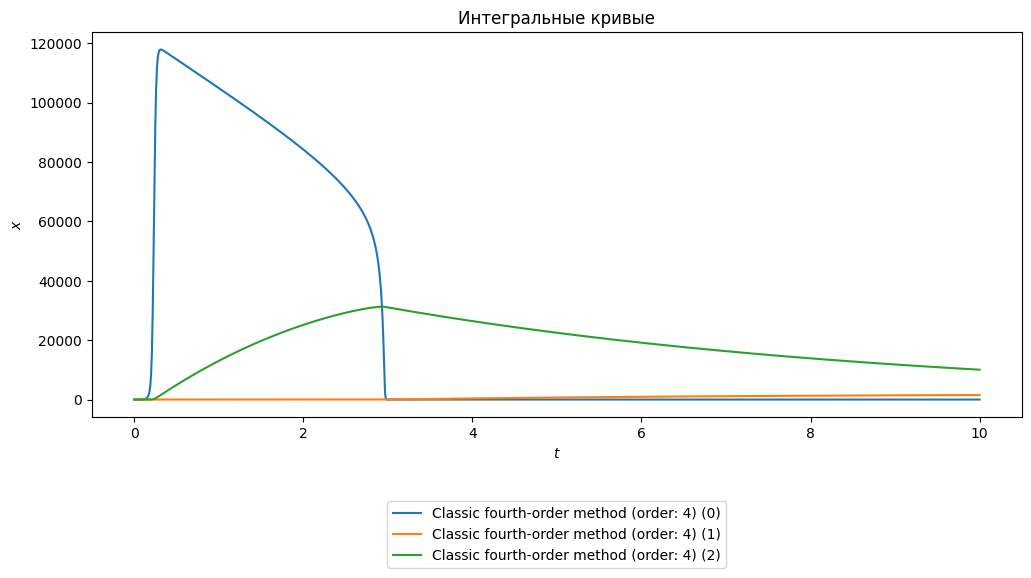

t: 9.19080000, len: 0000000921, 8.00112414

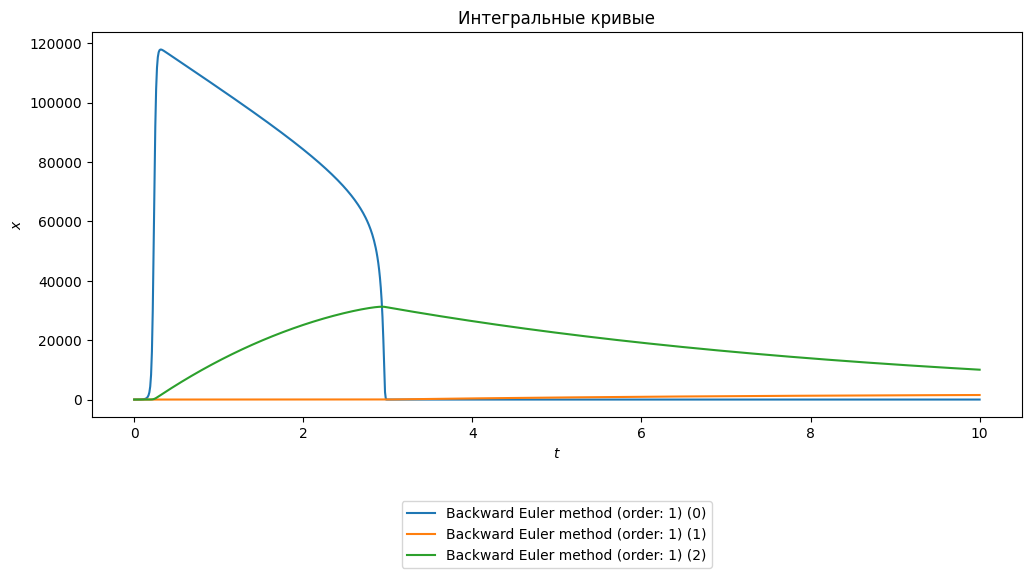

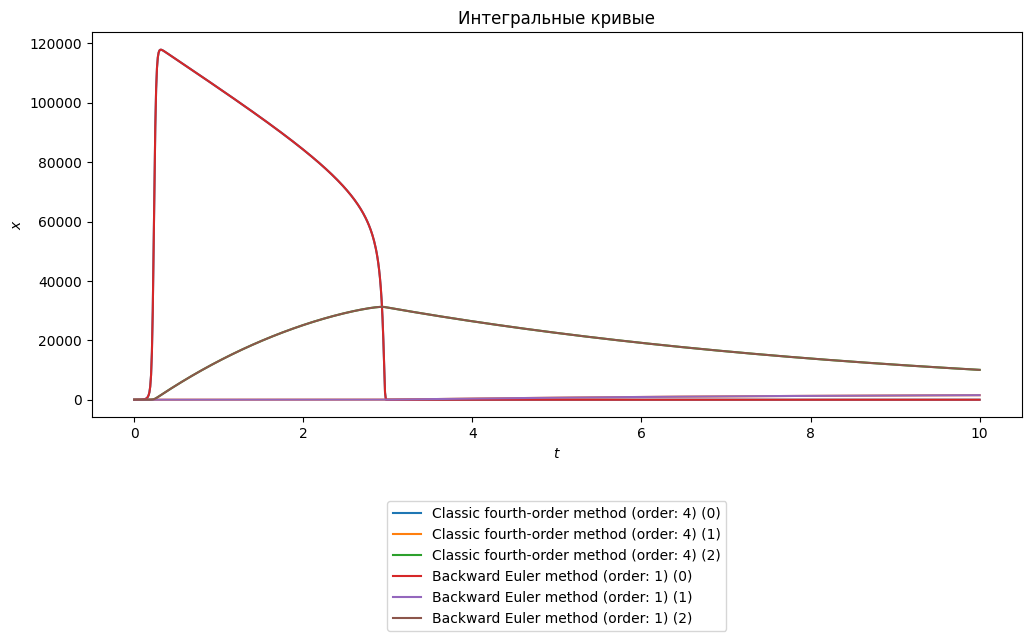

In [7]:
enabled = True
semi_verbose = True
import time

# t_stop = 800
t_stop = 10
tau = 0.00001


methods: list[solvers.RungeKuttaMethod] = []

# methods.append(
#     RungeKuttaMethod(
#         "Forward Euler method",
#         1,
#         ButcherTable(
#             [
#                 [0.0, 0.0],
#                 [0.0, 1.0],
#             ]
#         )
#     )
# )

# methods.append(
#     RungeKuttaMethod(
#         "Heun's method",
#         2,
#         ButcherTable(
#             [
#                 [0.0, 0.0, 0.0],
#                 [1.0, 1.0, 0.0],
#                 [0.0, 1/2, 1/2],
#             ]
#         )
#     )
# )

# methods.append(
#     RungeKuttaMethod(
#         "Kutta's third-order method",
#         3,
#         ButcherTable(
#             [
#                 [0.0,  0.0, 0.0, 0.0],
#                 [1/2,  1/2, 0.0, 0.0],
#                 [1.0, -1.0, 2.0, 0.0],
#                 [0.0,  1/6, 2/3, 1/6],
#             ]
#         )
#     )
# )

methods.append(
    solvers.RungeKuttaMethod(
        "Classic fourth-order method",
        4,
        solvers.ButcherTable(
            [
                [0.0, 0.0, 0.0, 0.0, 0.0],
                [1/2, 1/2, 0.0, 0.0, 0.0],
                [1/2, 0.0, 1/2, 0.0, 0.0],
                [1.0, 0.0, 0.0, 1.0, 0.0],
                [0.0, 1/6, 1/3, 1/3, 1/6],
            ]
        ),
        step=0.00001,
    )
)

methods.append(
    solvers.RungeKuttaMethod(
        "Backward Euler method",
        1,
        solvers.ButcherTable(
            [
                [1.0, 1.0],
                [0.0, 1.0],
            ]
        ),
        step=0.00001,
    )
)

last_output = time.time()

if enabled:
    for method in methods:
        tau = method.step or tau
        method = solvers.solve_runge_kutta(f, t_start, t_stop, tau, x_0, method, print_progress=print_progress, include_every_n=int(0.01 / tau))
        if plot_single:
            plotters.plot_solutions([method], multidimensionals_solution=True)

    plotters.plot_solutions(methods, multidimensionals_solution=True)

In [30]:
enabled = True

t_stop = 800
tau = 0.00001

class RungeKuttaMethod:
    def __init__(self, name: str, order: int, table: ButcherTable):
        self.name = name
        self.order = order
        self.table = table
        self.solution = None
    
    def set_solution(self, t, x, x_dot):
        self.solution = Solution(t, x, x_dot)

methods: list[RungeKuttaMethod] = []

methods.append(
    RungeKuttaMethod(
        "Backward Euler method",
        1,
        ButcherTable(
            [
                [1.0, 1.0],
                [0.0, 1.0],
            ]
        )
    )
)

methods.append(
    RungeKuttaMethod(
        "Crank-Nicolson method",
        2,
        ButcherTable(
            [
                [0.0, 0.0, 0.0],
                [1.0, 1/2, 1/2],
                [0.0, 1/2, 1/2],
            ]
        )
    )
)

methods.append(
    RungeKuttaMethod(
        "Kraaijevanger and Spijker's two-stage Diagonally Implicit Runge–Kutta method",
        2,
        ButcherTable(
            [
                [1/2,  1/2, 0.0],
                [3/2, -1/2, 2.0],
                [0.0, -1/2, 3/2],
            ]
        )
    )
)

last_output = time.time()

if enabled:
    for method in methods:
        start_time = time.time()
        t = [0]
        i = 1
            
        x = [
            np.array([0.5, 0.5, 0.5])
        ]
        
        x_i = x[0]
        t_i = t[0]
        
        print(method.name, method.order)
        
        while t_i <= t_stop:
            try:
                x_i = solve_runge_kutta_implicit(tau, t_i, x_i, f, method.table)
                t_i = t_i + tau

                if i % 50 == 0: # Or Linux kills vscode due to large memory usage
                    x.append(x_i)
                    t.append(t_i)
            
                i += 1
                
                if verbose or semi_verbose and time.time() - last_output > 1:
                    print(f"\rt: {t[-1]:.8f}, len: {len(t):010}, {time.time() - start_time:010.8f}", end="")
                    last_output = time.time()
                
            except Exception as e:
                print(e)
                print(f"Failed to solve at t = {t[-1]}")
                break
            
        method.set_solution(
            t, 
            np.array(x),
            np.array(x),
        )
        
        plot_solutions([method], multidimensionals_solution=True)

    plot_solutions(methods, multidimensionals_solution=True)

Backward Euler method 1
t: 208.45200005, len: 0000416905, 1553.55433464

KeyboardInterrupt: 

In [ ]:
import time

enabled = True

semi_verbose = True

# t_stop = 16
t_stop = 800
max_err = 5
max_tau = 1

tau = max_tau

class AdaptiveButcherTable:
    def __init__(self, A):
        self.a = []
        self.c = []
        self.b_1 = []
        self.b_2 = []
        
        self.s = len(A) - 2
        
        for i in range(self.s):
            self.a.append([])
            for j in range(self.s):
                self.a[i].append(A[i][j + 1])

            self.b_1.append(A[self.s + 0][i + 1])
            self.b_2.append(A[self.s + 1][i + 1])
            
            self.c.append(A[i][0])

class AdaptiveRungeKuttaMethod:
    def __init__(self, name: str, order: int, table: AdaptiveButcherTable):
        self.name = name
        self.order = order
        self.table = table
        self.solution = None
        self.type = "AdaptiveImplicit"
    
    def set_solution(self, t, x, x_dot):
        self.solution = Solution(t, x, x_dot)

methods: list[RungeKuttaMethod] = []

methods.append(
    AdaptiveRungeKuttaMethod(
        "Lobatto IIIC 4 order method",
        4,
        AdaptiveButcherTable(
            [
                [0.0,  1/6, -1/3,   1/6],
                [1/2,  1/6, 5/12, -1/12],
                [1.0,  1/6,  2/3,   1/6],
                [0.0, -1/2,  2.0,  -1/2],
                [0.0,  1/6,  2/3,   1/6],
            ]
        )
    )
)

# methods.append(
#     AdaptiveRungeKuttaMethod(
#         "Gauss-Legendre method",
#         4,
#         AdaptiveButcherTable(
#             [
#                 [1 / 2 - np.sqrt(3) / 6, 1 / 4                 , 1 / 4 - np.sqrt(3) / 6],
#                 [1 / 2 + np.sqrt(3) / 6, 1 / 4 + np.sqrt(3) / 6, 1 / 4                 ],
#                 [0                     , 1 / 2 + np.sqrt(3) / 2, 1 / 2 - np.sqrt(3) / 2],
#                 [0                     , 1 / 2                 , 1 / 2                 ],
#             ]
#         )
#     )
# )

start_time = time.time()
last_output = start_time

# with open("stiff_runge_kutta_solution", "a") as

if enabled:
    for method in methods:
        t = [0]
        i = 1
            
        x = [
            np.array([0.5, 0.5, 0.5])
        ]
        
        print(method.name, method.order)
        
        while t[-1] <= t_stop:
            try:
                x_i, err = solve_runge_kutta_implicit_adaptive(tau, t[i - 1], x[i - 1], f, method.table)
                tau *= (max_err / err) ** (1 / (method.order))
                if tau > max_tau:
                    tau = max_tau
                
                if err < max_err * 1.1:
                    if verbose or semi_verbose and time.time() - last_output > 1:
                        print(f"\rtau: {tau:.8f}, t: {t[-1]:.8f}, err: {err:010.8f}, len: {len(t):010}, {time.time() - start_time:010.8f}", end="")
                        last_output = time.time()
                    x.append(x_i)
                    t.append(t[-1] + tau)
            
                    i += 1
            except Exception as e:
                print(e)
                print(f"Failed to solve at t = {tau * i}")
                break
            
        method.set_solution(
            t,
            np.array(x),
            np.array(x),
        )
        
        plot_solutions([method], multidimensionals_solution=True)
        
        plt.figure(figsize=(12, 5))
        plt.plot(t[:-1], np.array(t[1:]) - np.array(t[:-1]))    
        plt.xlabel("$t$")
        plt.ylabel("$\\tau$")
        plt.title("Зависимость шага интегрирования от $t$")
        plt.show()

    plot_solutions(methods, multidimensionals_solution=True)


## Неявные метода дифференцирования назад

In [ ]:
tau = 0.01
t_stop = 800

enabled = True

class ImplicitBackwardDiffenetiationMethod:
    def __init__(self, order: int):
        self.name = "Implicit backward differentiation method"
        self.order = order
        self.solution = None
    
    def set_solution(self, t, x, x_dot):
        self.solution = Solution(t, x, x_dot)

methods: list[ImplicitBackwardDiffenetiationMethod] = []

methods.append(
    ImplicitBackwardDiffenetiationMethod(
        1,
    )
)

methods.append(
    ImplicitBackwardDiffenetiationMethod(
        2,
    )
)

methods.append(
    ImplicitBackwardDiffenetiationMethod(
        3,
    )
)

methods.append(
    ImplicitBackwardDiffenetiationMethod(
        4,
    )
)

if enabled:
    for method in methods:
        
        t = [0]
        i = 1

        x = [
            np.array([0.5, 0.5, 0.5])
        ]

        print(method.name, method.order)
        
        while tau * i <= t_stop:
            try:
                x.append(solve_backward_differentiation_implicit(tau, t[i - 1], x, f, method.order))
            except Exception as e:
                print(e)
                print(f"Failed to solve at t = {tau * i}")
                break
            
            t.append(tau * i)
            
            i += 1
            
            if verbose:
                print(tau * i)
        
        method.set_solution(
            t, 
            np.array(x),
            np.array(x),
        )
        plot_solutions([method], multidimensionals_solution=True)
        
    plot_solutions(methods, multidimensionals_solution=True)

## Неявные методы Адамса

Методы Адамса высших порядков оказались нестабильными при различных шагах сетки

In [ ]:
tau = 0.01
t_stop = 800

enabled = True

class ImplicitAdamsMethod:
    def __init__(self, order: int):
        self.name = "Implicit Adams method"
        self.order = order
        self.solution = None
    
    def set_solution(self, t, x, x_dot):
        self.solution = Solution(t, x, x_dot)

methods: list[ImplicitAdamsMethod] = []

methods.append(
    ImplicitAdamsMethod(
        0,
    )
)

methods.append(
    ImplicitAdamsMethod(
        1,
    )
)

methods.append(
    ImplicitAdamsMethod(
        2,
    )
)

methods.append(
    ImplicitAdamsMethod(
        3,
    )
)

if enabled:
    for method in methods:
        t = [0]
        i = 1

        x = [
            np.array([0.5, 0.5, 0.5])
        ]

        print(method.name, method.order)
        
        while tau * i <= t_stop:
            try:
                x.append(solve_adams_implicit(tau, t[i - 1], x, f, method.order))
            except Exception as e:
                print(e)
                print(f"Failed to solve at t = {tau * i}")
                break
            
            t.append(tau * i)
            
            i += 1
            
            if verbose:
                print(tau * i)
        
        method.set_solution(
            t, 
            np.array(x),
            np.array(x),
        )
        plot_solutions([method], multidimensionals_solution=True, parameter="k")
